# Primeiras visualizações e tratamentos dos dados georreferenciados

In [8]:
import pandas as pd
import geopandas as gpd
import contextily as cx
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('dataset_cnpj_praia_grande_03.csv', delimiter=';', encoding='ISO-8859-1', dtype='str')

In [10]:
df[['latitude', 'longitude']] = df['latlong'].str.replace("(","").\
                                              str.replace(")","").\
                                              str.replace("'","").\
                                              str.split(',', expand=True)

df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
#https://epsg.io/31983
gdf.crs = "EPSG:4326"

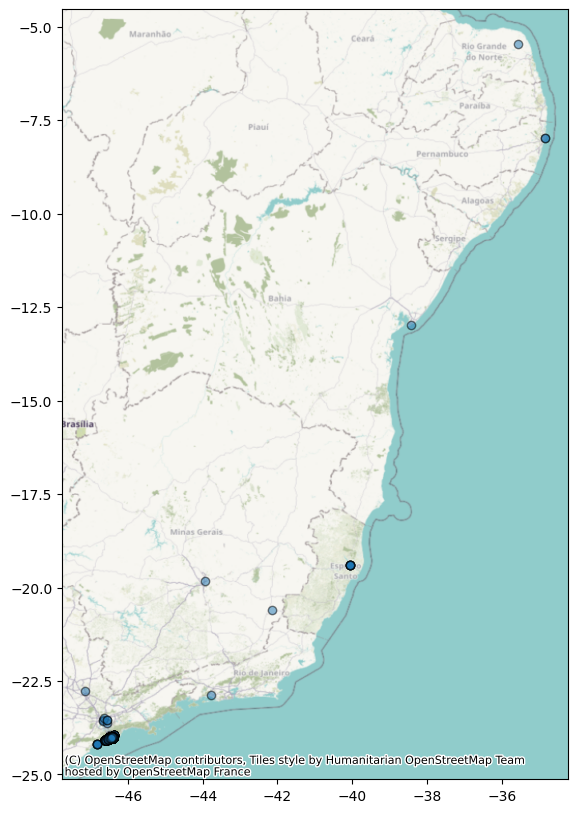

In [11]:
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax, crs=gdf.crs)
plt.savefig("01_primeira_visualizacao.jpg")

## Remoção de outliers

In [12]:
#calculando os quartis e o intervalo interquartil
Q1_latitude = gdf['latitude'].quantile(0.25)
Q3_latitude = gdf['latitude'].quantile(0.75)
IQR_latitude = Q3_latitude - Q1_latitude

Q1_longitude = gdf['longitude'].quantile(0.25)
Q3_longitude = gdf['longitude'].quantile(0.75)
IQR_longitude = Q3_longitude - Q1_longitude

#remoção dos outliers através da regra 1,5*IQR
#https://online.stat.psu.edu/stat200/lesson/3/3.2
limite_inferior_latitude = Q1_latitude - 1.5 * IQR_latitude
limite_superior_latitude = Q3_latitude + 1.5 * IQR_latitude
limite_inferior_longitude = Q1_longitude - 1.5 * IQR_longitude
limite_superior_longitude = Q3_longitude + 1.5 * IQR_longitude

gdf = gdf[(gdf['latitude'] >= limite_inferior_longitude) & (gdf['latitude'] <= limite_superior_latitude) &
          (gdf['longitude'] >= limite_inferior_longitude) & (gdf['longitude'] <= limite_superior_longitude)]

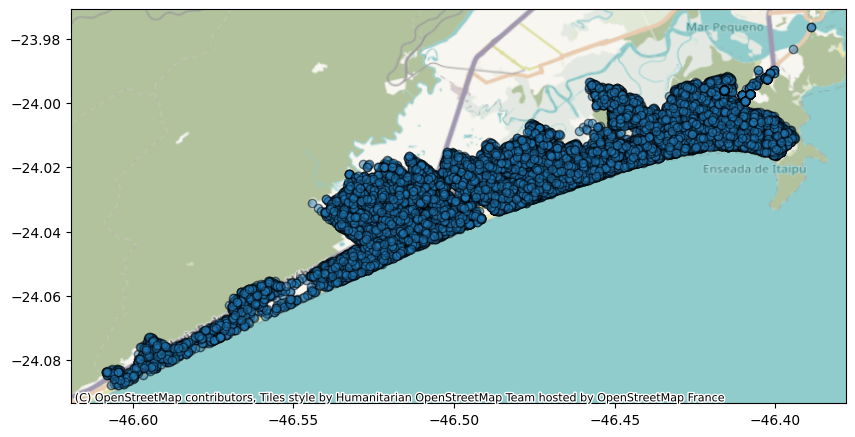

In [13]:
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax, crs=gdf.crs)
plt.savefig("02_outliers_removidos.jpg")

### TODO
-  Realizar analises baseadas nos CNAEs
-  Buscar padrões nos clusters e na dispersão de empresas do mesmo tipo
-  calcular distancia média de estabelecimentos do mesmo tipo

In [14]:
gdf.to_file('dataset_cnpj_praia_grande_03.geojson', driver='GeoJSON')